In [1]:
import sympy as sm
import numpy as np
import matplotlib.pyplot as plt
N = 14
phi0,phi1,phi2,phi3,phi4,phi5,phi6,phi7,phi8p,phi9,phi10,phi11,phi12,phi13,phi14,phi15 = sm.symbols('varphi0:16')

In [2]:
L = 4
u = 1

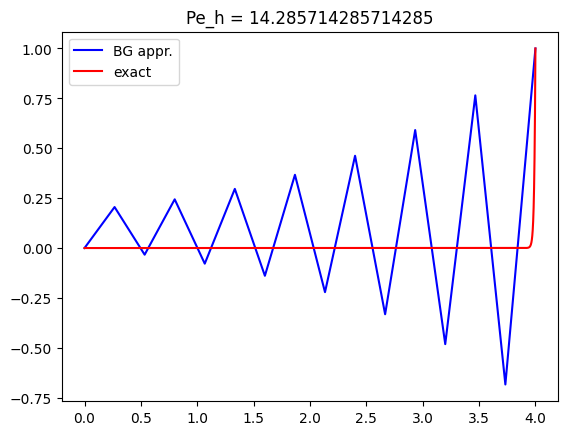

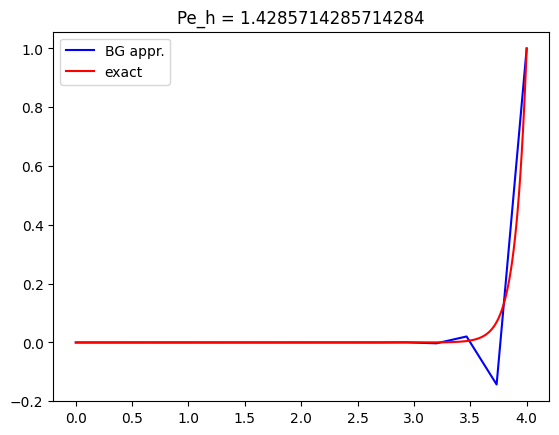

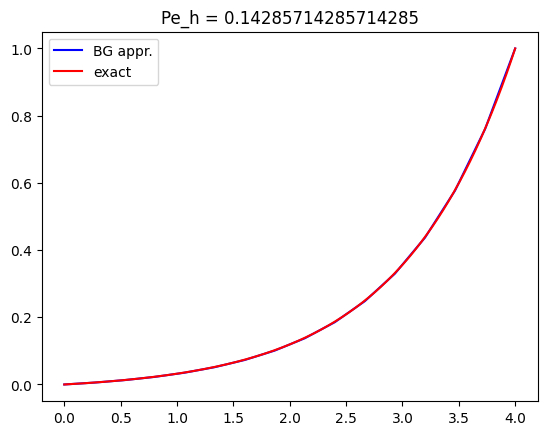

<Figure size 640x480 with 0 Axes>

In [3]:
def c0(eps,N):
    h = L/(N+1)
    c = -u/2 - eps/h
    return c
def c1(eps,N):
    h = L/(N+1)
    c = -eps/h
    return c
def c2(eps,N):
    h = L/(N+1)
    c = u/2 - eps/h
    return c
def C(eps,N):
    Matrix = np.zeros((N,N))
    for i in range(0,N):
        Matrix[i,i] = -2*c1(eps,N)
    for i in range(0,N-1):
        Matrix[i+1,i] = c0(eps,N)
        Matrix[i,i+1] = c2(eps,N)
    return Matrix
def xlist(N):
    h = L/(N+1)
    xlist1 = []
    for i in range(0,N+2):
        xlist1.append(i*h)
    return xlist1

def b_for_f_is_0(eps,N):
    Vector = np.zeros((N,1))
    Vector[-1,0] = -c2(eps,N)
    return Vector
def BuGaAppr_for_f_is_0(eps,N):
    Cinv = np.linalg.inv(C(eps,N))
    #solution = Cinv@b_for_f_is_0(eps,N)
    solution = np.linalg.solve(C(eps,N), b_for_f_is_0(eps,N))
    return solution
def exact_for_f_is_0(eps,x):
    return (np.exp(u*x/eps)-1)/(np.exp(u*L/eps)-1)
def gridpoints_exact_for_f_is_0(eps,N):
    philist = []
    for x in xlist(N):
        philist.append(exact_for_f_is_0(eps,x))
    return philist
    

def for_f_is_0_plot(epslist,N):
    h = L/N
    for eps in epslist:
        apprlist = [0]
        for value in BuGaAppr_for_f_is_0(eps,N)[:,0]:
            apprlist.append(value)
        apprlist.append(1)
        plt.plot(xlist(N), apprlist, color='b', label='BG appr.')
        plt.plot(xlist(1000),gridpoints_exact_for_f_is_0(eps,1000),color='r',label='exact')
        plt.legend()
        plt.title('Pe_h = ' + str(u*h/(2*eps)))
        plt.figure()

epslist = [0.01, 0.1, 1]
N = 14
for_f_is_0_plot(epslist,N)

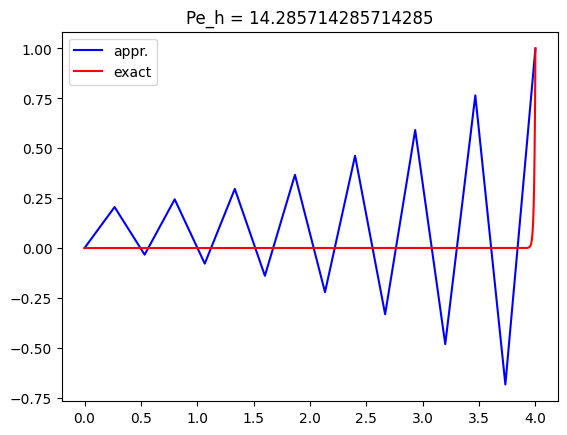

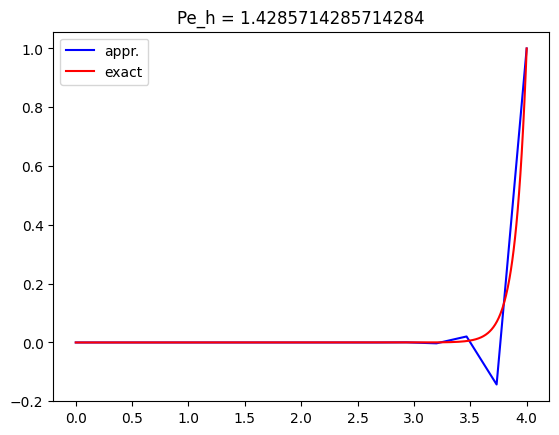

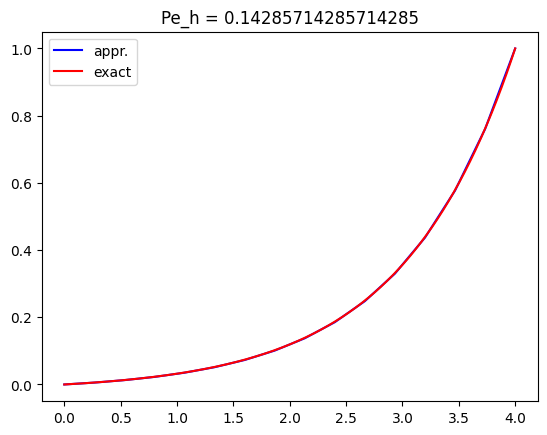

<Figure size 640x480 with 0 Axes>

In [4]:

def lam1(eps,N):
    return c1(eps,N)/c2(eps,N) + np.sqrt(c1(eps,N)**2/c2(eps,N)**2 - c0(eps,N)/c2(eps,N))
def lam2(eps,N):
    return c1(eps,N)/c2(eps,N) - np.sqrt(c1(eps,N)**2/c2(eps,N)**2 - c0(eps,N)/c2(eps,N))
def v(eps,N):
    Vector = np.zeros((N+2,1))
    l1 = lam1(eps,N)
    l2 = lam2(eps,N)
    factor = 1/(l1**(N+1) - l2**(N+1))
    for i in range(0,N+2):
        Vector[i,0] = factor*(l1**i - l2**i)
    return Vector

def for_f_is_0_check(epslist,N):
    h = L/N
    for eps in epslist:
        apprlist = v(eps,N)[:,0]
        plt.plot(xlist(N), apprlist, color='b', label='appr.')
        plt.plot(xlist(1000),gridpoints_exact_for_f_is_0(eps,1000),color='r',label='exact')
        plt.legend()
        plt.title('Pe_h = ' + str(u*h/(2*eps)))
        plt.figure()

epslist = [0.01, 0.1, 1]
N = 14
for_f_is_0_check(epslist,N)


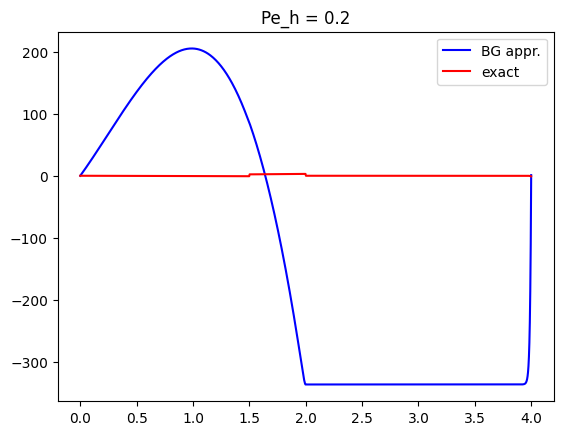

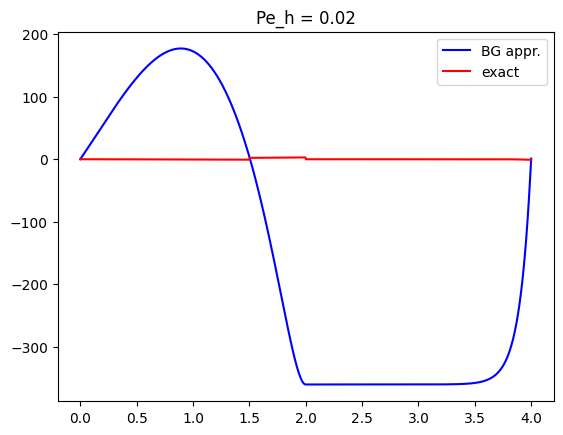

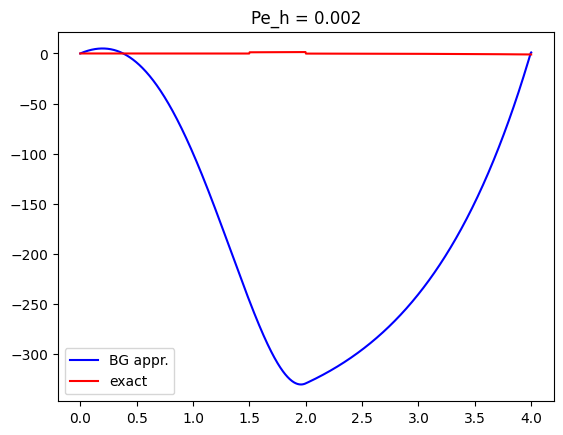

<Figure size 640x480 with 0 Axes>

In [6]:
def func2(x,xjm1,xj,xjp1):
    return x*2 - 2*x*xjm1 - x**3/3 + x*2*xjm1/2
def func3(x,xjm1,xj,xjp1):
    return 2*x*xjp1 - x*2 - x**2*xjp1/2 + x*3/3
def func5(x,xjm1,xj,xjp1):
    return x*3/3 - x**2*xjm1/2 - x*2/2 + x*xjm1
def func6(x,xjm1,xj,xjp1):
    return x*2*xjp1/2 - x**3/3 - x*xjp1 + x*2/2
def b_for_fnew(eps,N):
    Vector = np.zeros((N,1))
    h = L/N
    for i in range(0,N):
        j = i+1
        xjm1 = (j-1)*h
        xj = j*h
        xjp1 = (j+1)*h
        if xjm1 >= 2:
            bj = 0
        elif 1.5 < xjm1 <= 2 and 2 < xj:
            bj = (func2(2,xjm1,xj,xjp1) - func2(xjm1,xjm1,xj,xjp1))/h
        elif 1.5 < xjm1 and xj <= 2 and 2 < xjp1:
            bj = (func2(xj,xjm1,xj,xjp1) - func2(xjm1,xjm1,xj,xjp1))/h + (func3(2,xjm1,xj,xjp1) - func3(xj,xjm1,xj,xjp1))/h
        elif 1.5 < xjm1 and xjp1 <= 2:
            bj = (func2(xj,xjm1,xj,xjp1) - func2(xjm1,xjm1,xj,xjp1))/h + (func3(xjp1,xjm1,xj,xjp1) - func3(xj,xjm1,xj,xjp1))/h
        elif xjm1 <= 1.5 and 1.5 < xj:
            bj = (func5(1.5,xjm1,xj,xjp1) - func5(xjm1,xjm1,xj,xjp1))/h + (func2(xj,xjm1,xj,xjp1) - func2(1.5,xjm1,xj,xjp1))/h + (func3(xjp1,xjm1,xj,xjp1) - func3(xj,xjm1,xj,xjp1))/h
        elif xj <= 1.5 and 1.5 < xjp1:
            bj = (func5(xj,xjm1,xj,xjp1) - func5(xjm1,xjm1,xj,xjp1))/h + (func6(1.5,xjm1,xj,xjp1) - func6(xj,xjm1,xj,xjp1))/h + (func3(xjp1,xjm1,xj,xjp1) - func3(1.5,xjm1,xj,xjp1))/h
        elif xjp1 <= 1.5:
            bj = (func5(xj,xjm1,xj,xjp1) - func5(xjm1,xjm1,xj,xjp1))/h + (func6(xjp1,xjm1,xj,xjp1) - func6(xj,xjm1,xj,xjp1))/h
        else:
            bj = 0
            print('error in your code of the vector b', xjm1, xj, xjp1)
        Vector[i,0] = bj
    Vector[-1,0] += -2*c2(eps,N)
    return Vector
def BuGaAppr_for_fnew(eps,N):
    Cinv = np.linalg.inv(C(eps,N))
    solution = np.linalg.solve(C(eps,N), b_for_fnew(eps,N))
    return solution
def exact_for_fnew(eps,x):
    factor = 1/(-1+np.exp(u*L/eps))
    if x <= 1.5:
        a = -1
        b = 1
    elif 1.5 < x <= 2:
        a = 1
        b = -2
    elif 2 < x:
        a = 0
        b = 0
    d = factor * (1 - (a*(2*eps*L + u*L*2))/(2*u*2) - (b*L)/u)
    term1 = d*np.exp(u*x/eps)
    term2 = (a*(2*eps*x + u*x*2))/(2*u*2)
    term3 = b*x/u
    term4 = -d
    return -(term1 + term2 + term3 + term4)
def gridpoints_exact_for_fnew(eps,N):
    philist = []
    for x in xlist(N):
        philist.append(exact_for_fnew(eps,x))
    return philist
def for_fnew_plot(epslist,N):
    h = L/N
    for eps in epslist:
        apprlist = [0]
        for value in BuGaAppr_for_fnew(eps,N)[:,0]:
            apprlist.append(value)
        apprlist.append(1)
        plt.plot(xlist(N), apprlist, color='b', label='BG appr.')
        plt.plot(xlist(1000),gridpoints_exact_for_fnew(eps,1000),color='r',label='exact')
        plt.legend()
        plt.title('Pe_h = ' + str(u*h/(2*eps)))
        plt.figure()

epslist = [0.01, 0.1, 1]
N = 1000
for_fnew_plot(epslist,N)